# Esercizio 3

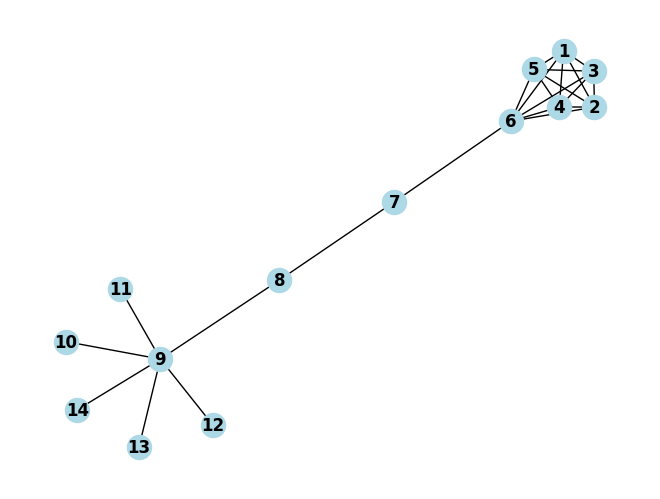

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() #grafo non orientato
edges = [
    (1, 2), (1, 3), (1, 4), (1, 5), (1, 6),
    (2, 3), (2, 4), (2, 5), (2, 6), 
    (3, 4), (3, 5), (3, 6),
    (4, 5), (4, 6), (5, 6),
    (6, 7), (7, 8), (8, 9), (9, 10), (9, 11), 
    (9, 12), (9, 13), (9, 14)
]
G.add_edges_from(edges) #aggiungo gli archi e i nodi al grafo
#Disegno per controllare
nx.draw(G, with_labels=True, node_color='lightblue', node_size=300, font_weight='bold')
plt.show()

## Punto a

In [2]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

Node 1: 0.38461538461538464
Node 2: 0.38461538461538464
Node 3: 0.38461538461538464
Node 4: 0.38461538461538464
Node 5: 0.38461538461538464
Node 6: 0.46153846153846156
Node 7: 0.15384615384615385
Node 8: 0.15384615384615385
Node 9: 0.46153846153846156
Node 10: 0.07692307692307693
Node 11: 0.07692307692307693
Node 12: 0.07692307692307693
Node 13: 0.07692307692307693
Node 14: 0.07692307692307693


Nodi con un numero maggiore di archi hanno valori superiori a nodi con un numero minore di archi. <br>
Non si tiene conto dell'importanza delle connessioni.

In [3]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")

Node 1: 0.404208042495086
Node 2: 0.404208042495086
Node 3: 0.404208042495086
Node 4: 0.404208042495086
Node 5: 0.404208042495086
Node 6: 0.4185766681354634
Node 7: 0.08672190464962151
Node 8: 0.018113426010031138
Node 9: 0.004484156952836004
Node 10: 0.0008913128082836684
Node 11: 0.0008913128082836684
Node 12: 0.0008913128082836684
Node 13: 0.0008913128082836684
Node 14: 0.0008913128082836684


Vengono considerati sia il numero di archi di ogni nodo, sia l'importanza dei nodi a cui sono collegati.<br>
I nodi dall'uno al cinque sono i nodi con valori maggiori poichè ogni nodo ha una buona centralità ed è collegato ad altri nodi altrettanto centrali.

In [4]:
# Invariant Distribution Centrality 
adj_matrix = nx.adjacency_matrix(G).todense()
identity_matrix=np.eye(len(G.nodes), dtype=int)
sum_rows = np.sum(adj_matrix,1)
P = adj_matrix / sum_rows[:,np.newaxis]  
P_final=np.zeros((len(G.nodes),len(G.nodes)))
for i in range(len(G.nodes)):
    for j in range(len(G.nodes)):
        if i==j:
            P_final[i][j]=1-P[i][j]
        else:
            P_final[i][j]=-1*P[j][i]
A=np.vstack([P_final,np.ones(len(G.nodes))])
b=np.append(np.zeros(len(G.nodes)),1)
invariant_distribution = np.linalg.lstsq(A, b, rcond=None)[0]
for node, centrality in enumerate(invariant_distribution):
    print(f"Node {node+1}: {centrality}")


Node 1: 0.10869565217391317
Node 2: 0.10869565217391344
Node 3: 0.10869565217391329
Node 4: 0.10869565217391333
Node 5: 0.10869565217391328
Node 6: 0.13043478260869593
Node 7: 0.043478260869565036
Node 8: 0.04347826086956503
Node 9: 0.1304347826086948
Node 10: 0.02173913043478244
Node 11: 0.02173913043478244
Node 12: 0.02173913043478244
Node 13: 0.02173913043478244
Node 14: 0.02173913043478244


## Punto b

In [5]:
# Katz Centrality
beta = 0.15
mu =np.ones(len(G.nodes), dtype=float)/len(G.nodes)
lambda_max = np.max(np.linalg.eigvals(adj_matrix))
katz_centrality= np.linalg.inv(identity_matrix-(1-beta)/lambda_max*np.transpose(adj_matrix)).dot(beta*mu) 
for node, centrality in enumerate(katz_centrality):
    print(f"Node {node+1}: {centrality}")


Node 1: 0.07290450925268847
Node 2: 0.07290450925268846
Node 3: 0.07290450925268847
Node 4: 0.07290450925268847
Node 5: 0.07290450925268847
Node 6: 0.07680760227765836
Node 7: 0.027025691097618713
Node 8: 0.01982398407346623
Node 9: 0.026941737394307913
Node 10: 0.015262049204093554
Node 11: 0.01526204920409355
Node 12: 0.01526204920409355
Node 13: 0.01526204920409355
Node 14: 0.01526204920409355


## Punto c

In [6]:
# PageRank Centrality
#pg_centrality= np.linalg.inv(identity_matrix-(1-beta)*np.transpose(P)).dot(beta*mu)
pagerank_centrality = nx.pagerank(G)
for node, centrality in pagerank_centrality.items():
    print(f"Node {node}: {centrality}")


Node 1: 0.07657901462696959
Node 2: 0.07657901462696959
Node 3: 0.07657901462696959
Node 4: 0.07657901462696959
Node 5: 0.07657901462696959
Node 6: 0.09734855016790099
Node 7: 0.050686455894217684
Node 8: 0.06160417564033448
Node 9: 0.20715525651281927
Node 10: 0.04006209772997592
Node 11: 0.04006209772997592
Node 12: 0.04006209772997592
Node 13: 0.04006209772997592
Node 14: 0.04006209772997592


# Punto d


I risultati del punto c evidenziano il ruolo del nodo $n_9$, che emerge come il nodo più centrale della rete.<br>
Questo risultato è dovuto alla sua funzione di collegamento per i nodi periferici, che lo rende un nodo con una probabilità più elevata di essere visitato in una passeggiata casuale.<br>
Il nodo $n_6$, sebbene ancora centrale, ha un valore inferiore poiché i nodi a cui è collegato sono collegati fra loro, quindi per raggiungerli si può non passare sempre per $n_6$, <br>
cosa invece obbligatoria per $n_9$ (per raggiungere i nodi periferici bisogna sempre passare per $n_9$).<br>
I risultati del punto b evidenziano il nodo $n_6$ come il nodo più centrale della rete.<br>
Questo risultato è dovuto ai suoi collegamenti con altri nodi centrali e quindi gli aumentano la sua centralità.<br>
Il nodo $n_9$ invece non ha un valore molto alto in quanto non è collegato a nodi centrali.<br>
La katz centrality a differenza della eignvector centrality assegna valori di centralità a tutti i nodi, anche a quelli più perifrici (in particolare i nodi a cui è collegato $n_9$).